<a href="https://colab.research.google.com/github/rizinahammed/ict_assingments/blob/main/Unsupervised_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering


# Load Dataset

In [4]:
data = pd.read_csv("adult_dataset.csv")



print(data.shape)
data.head()

(47529, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


#Data Cleaning

In [5]:
data.replace('?', np.nan, inplace=True)



for col in data.select_dtypes(include='object').columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

for col in data.select_dtypes(include=['int64','float64']).columns:
    data[col].fillna(data[col].median(), inplace=True)


data.isnull().sum()

/tmp/ipython-input-724181086.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
/tmp/ipython-input-724181086.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


#Plot Histograms + KDE

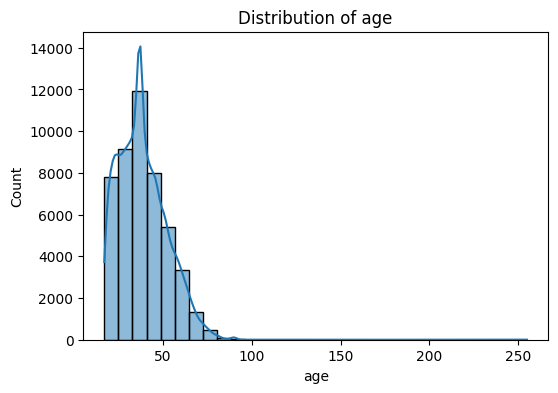

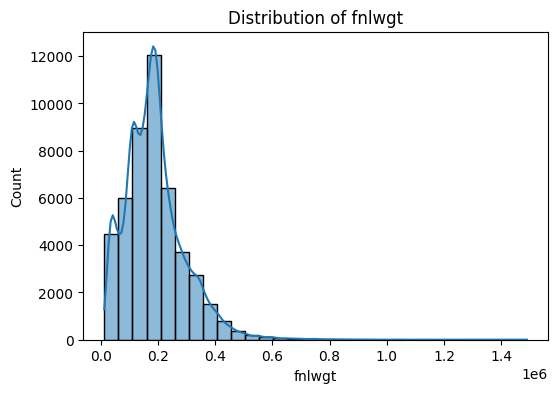

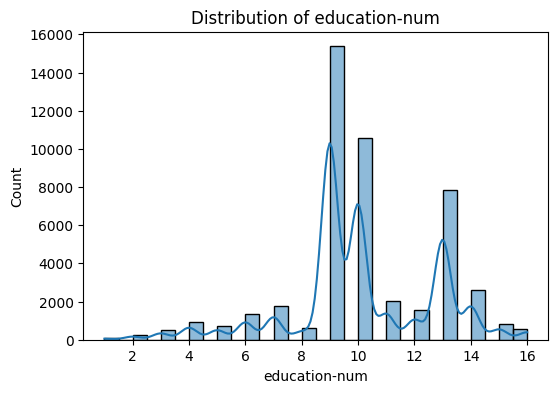

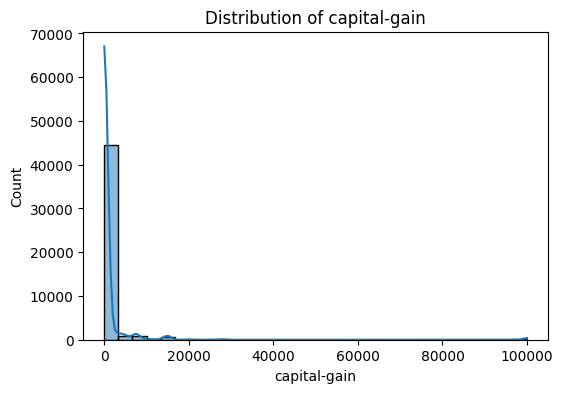

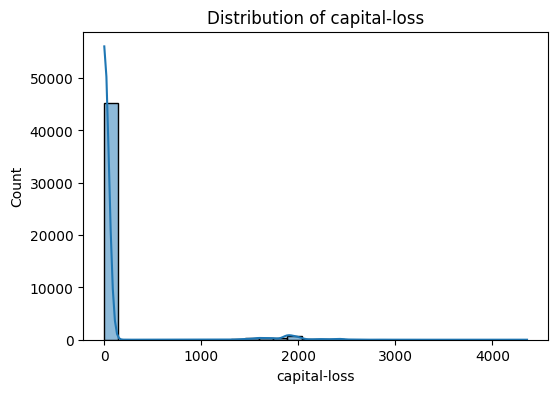

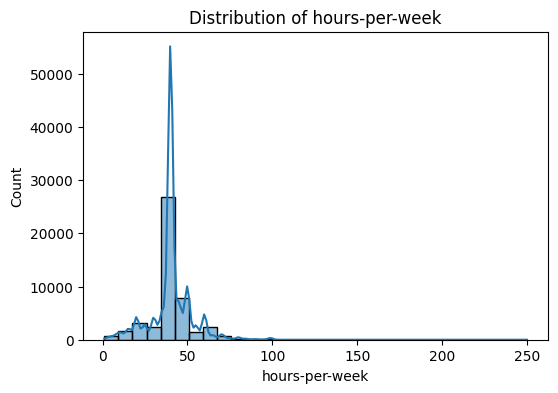

In [6]:
num_cols = data.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Outlier Detection (IQR method) for all numerical features

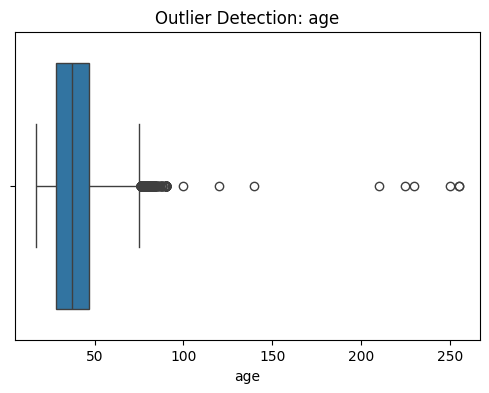

age: 352 outliers detected


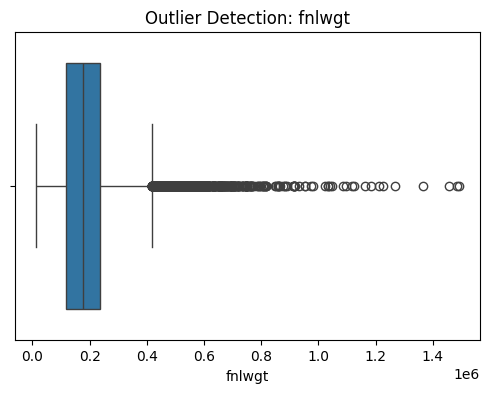

fnlwgt: 1409 outliers detected


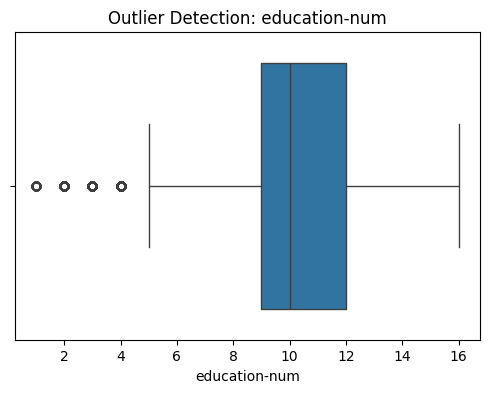

education-num: 1750 outliers detected


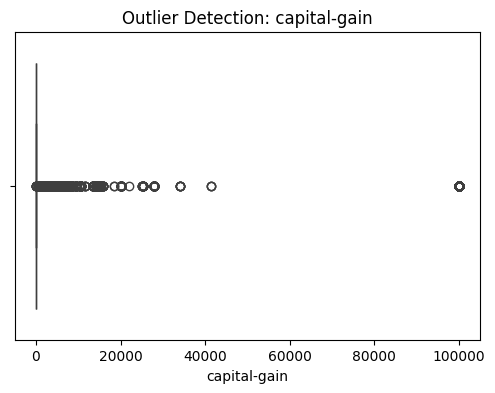

capital-gain: 3929 outliers detected


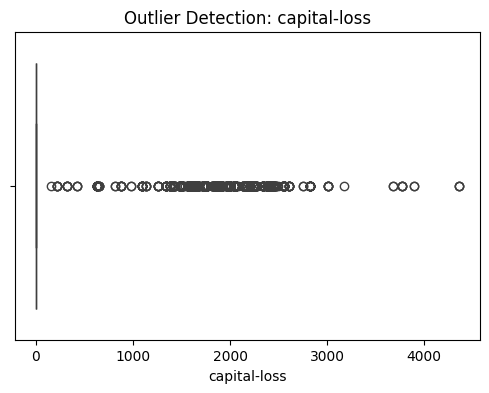

capital-loss: 2222 outliers detected


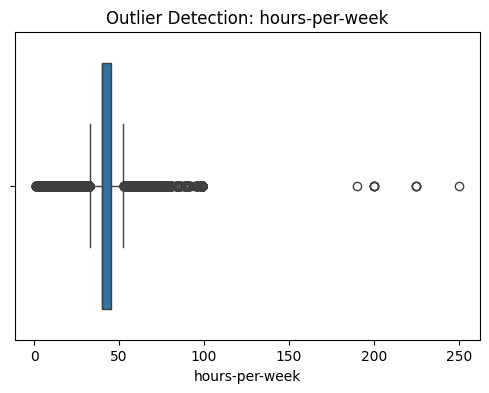

hours-per-week: 12480 outliers detected


{'age': 352,
 'fnlwgt': 1409,
 'education-num': 1750,
 'capital-gain': 3929,
 'capital-loss': 2222,
 'hours-per-week': 12480}

In [7]:
num_cols = data.select_dtypes(include=['int64','float64']).columns

outlier_summary = {}

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    outlier_summary[col] = len(outliers)

    # Plot boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f"Outlier Detection: {col}")
    plt.show()

    print(f"{col}: {len(outliers)} outliers detected")

# Summary of outliers
outlier_summary

# IQR-based removal for all numerical features

In [8]:
num_cols = data.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [9]:
data


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
5,37.0,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K
7,52.0,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47522,26.0,Local-gov,113948,Bachelors,13,Never-married,Protective-serv,Not-in-family,White,Female,0,0,48.0,United-States,<=50K.
47523,66.0,Private,135446,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40.0,United-States,<=50K.
47526,21.0,Private,180690,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,40.0,United-States,<=50K.
47527,40.0,Private,135384,HS-grad,9,Separated,Machine-op-inspct,Unmarried,Black,Female,0,0,40.0,United-States,<=50K.


#Visualise Feature Distribution

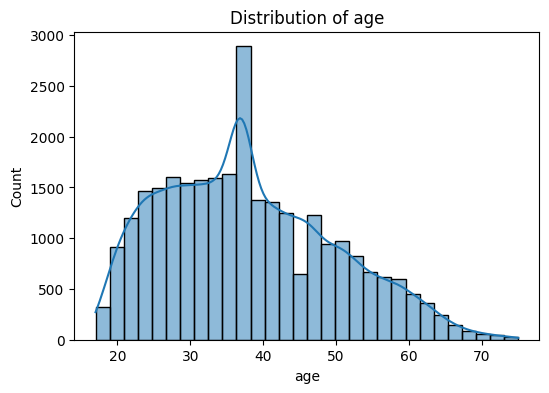

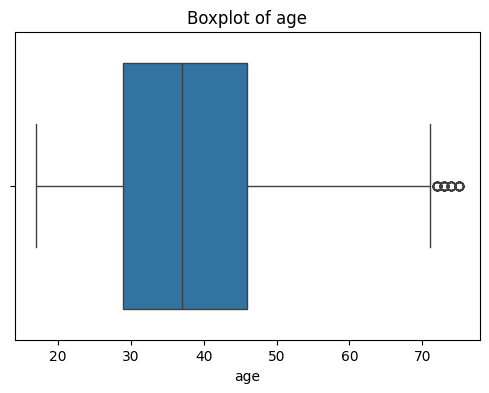

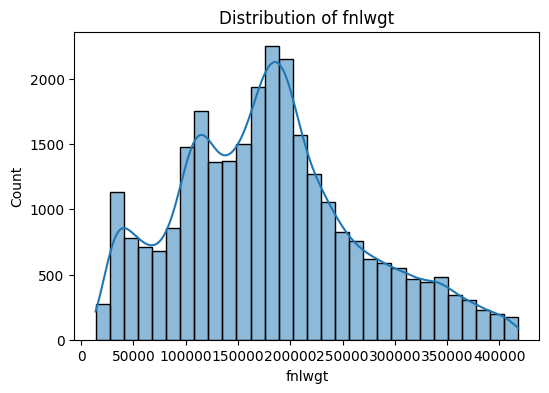

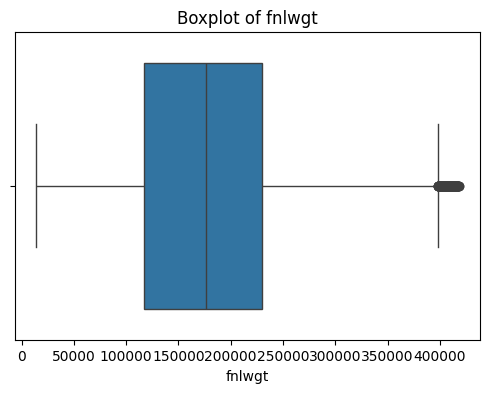

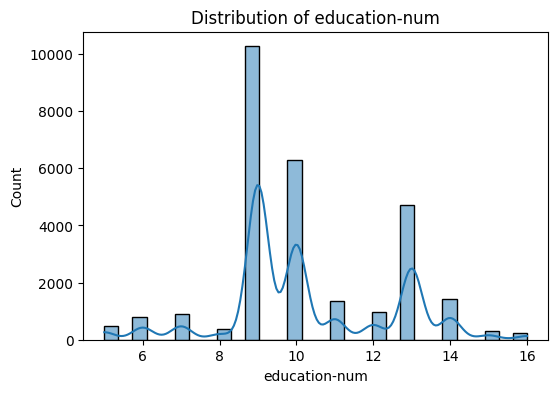

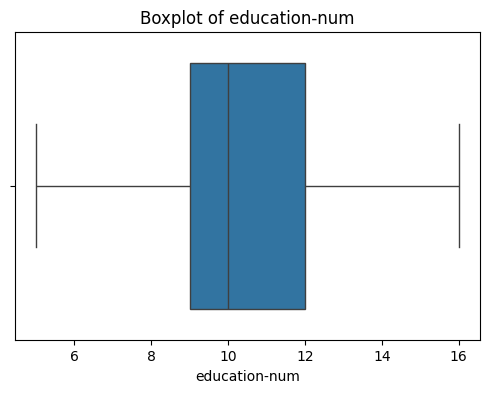

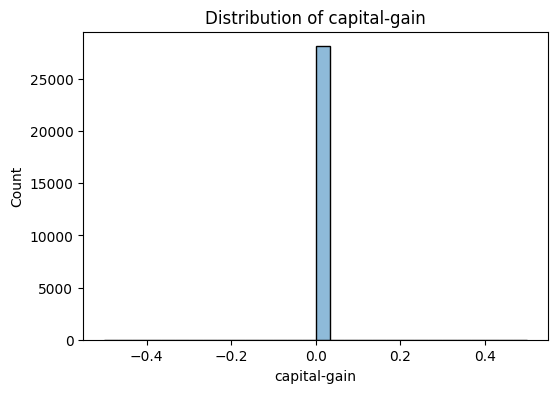

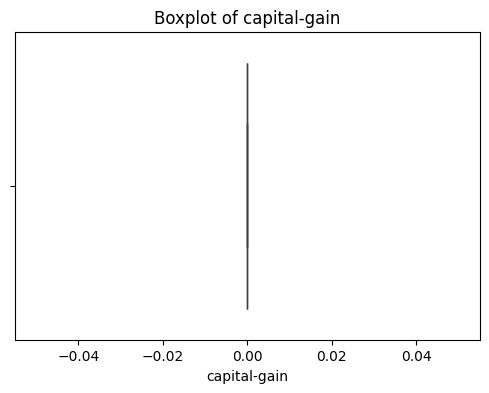

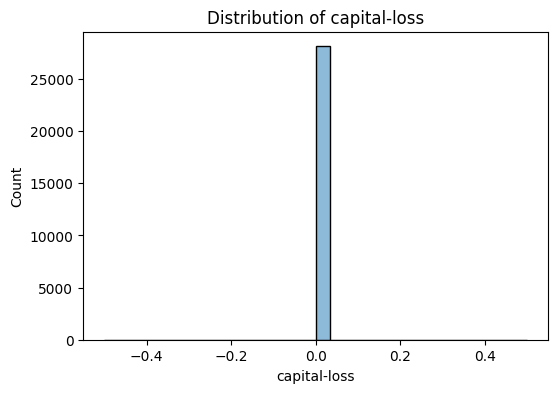

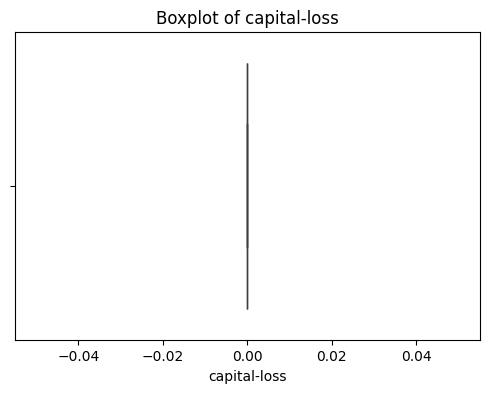

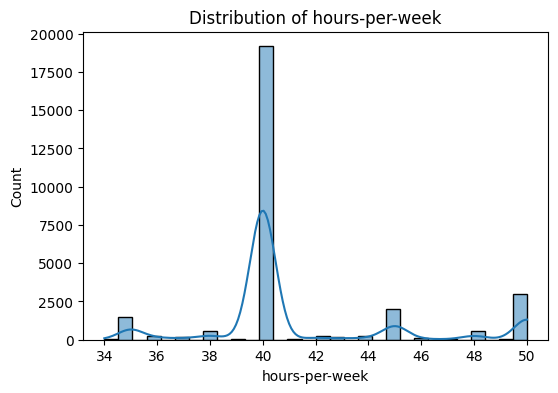

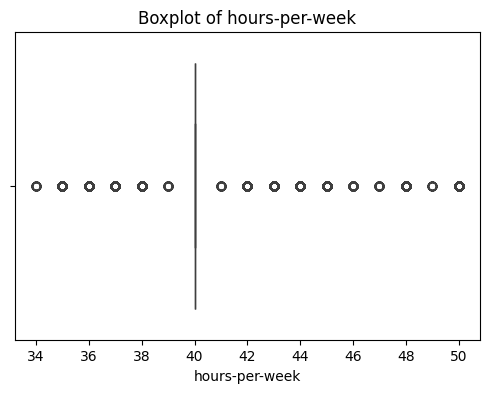

In [10]:
num_cols = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Correlation Analysis

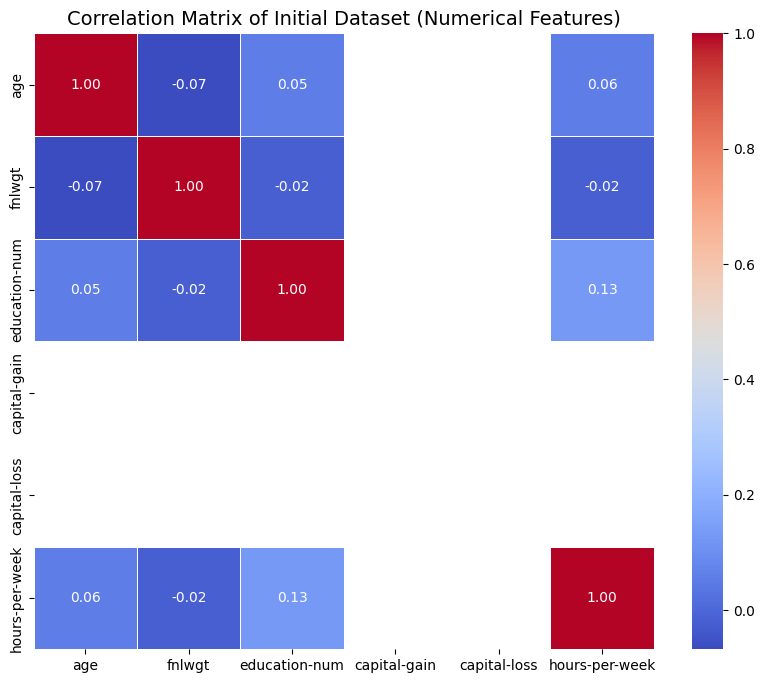

In [11]:
num_cols = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
corr_matrix = data[num_cols].corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Initial Dataset (Numerical Features)", fontsize=14)
plt.show()

#Drop columns after analysis

In [12]:
# Separate target
y = data['income']
data = data.drop(columns=['income','fnlwgt','education'])  # drop redundant and negative correlation features



# One-hot encode categorical

In [13]:
cat_cols = ['workclass','occupation','marital-status','relationship',
            'race','sex','native-country']
data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True).astype(int)


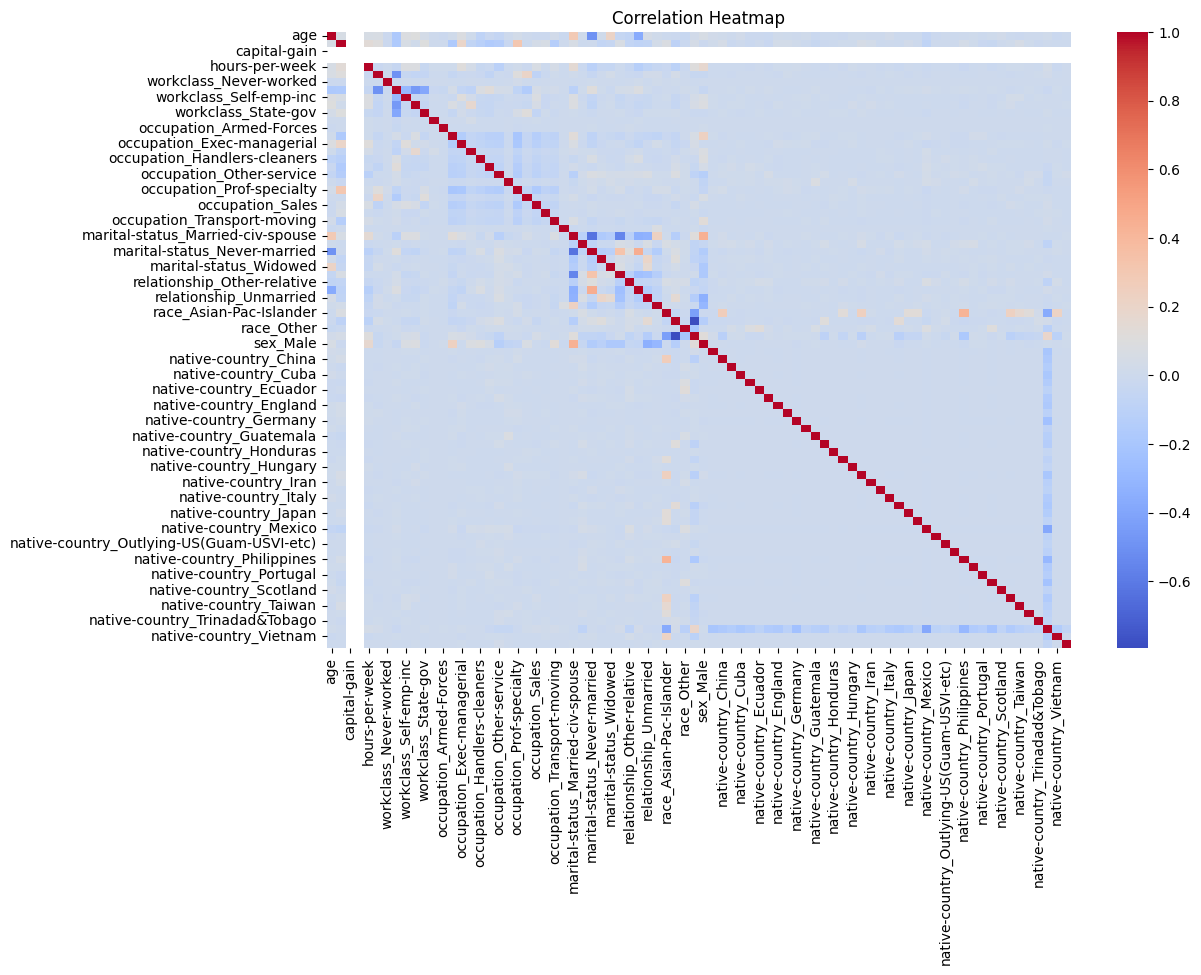

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(data_encoded.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Scale numerical + encoded features

In [15]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)
data_scaled


array([[ 0.00885452, -0.5775565 ,  0.        , ...,  0.27751468,
        -0.04177783, -0.0188602 ],
       [ 1.27934292, -1.50777936,  0.        , ...,  0.27751468,
        -0.04177783, -0.0188602 ],
       [-0.83813774,  1.28288923,  0.        , ..., -3.60341294,
        -0.04177783, -0.0188602 ],
       ...,
       [-1.43103233, -0.11244507,  0.        , ...,  0.27751468,
        -0.04177783, -0.0188602 ],
       [ 0.17825298, -0.5775565 ,  0.        , ...,  0.27751468,
        -0.04177783, -0.0188602 ],
       [ 0.85584679, -0.5775565 ,  0.        , ...,  0.27751468,
        -0.04177783, -0.0188602 ]])

# Feature reduction using PCA

In [16]:
pca = PCA().fit(data_scaled)
explained_variance = pca.explained_variance_ratio_



cum_var = np.cumsum(explained_variance)
print(cum_var)

[0.03830091 0.07006528 0.0971306  0.12177069 0.14327977 0.16364991
 0.18211892 0.19934211 0.21615485 0.23166258 0.24686673 0.26198793
 0.27646257 0.29068393 0.30481598 0.31887584 0.3328678  0.34665593
 0.3603593  0.37392699 0.38742088 0.40076502 0.41391765 0.42702034
 0.44009571 0.45306265 0.4659491  0.47882641 0.49169588 0.50455841
 0.51741653 0.53026816 0.54311402 0.55595684 0.56879688 0.58163615
 0.59447346 0.60730957 0.62014508 0.632977   0.64580837 0.65863873
 0.67146506 0.68428819 0.6970939  0.70988156 0.72266599 0.73543732
 0.74817975 0.76090078 0.77359604 0.78628164 0.79889219 0.81146754
 0.82402139 0.83653685 0.84884799 0.86098086 0.87295437 0.88488578
 0.89664429 0.90823467 0.91976721 0.93085588 0.94151206 0.95163783
 0.961511   0.97089773 0.97822138 0.98492085 0.98968277 0.99382994
 0.99659986 0.99827458 0.99930335 0.99981609 0.99993857 1.
 1.         1.        ]


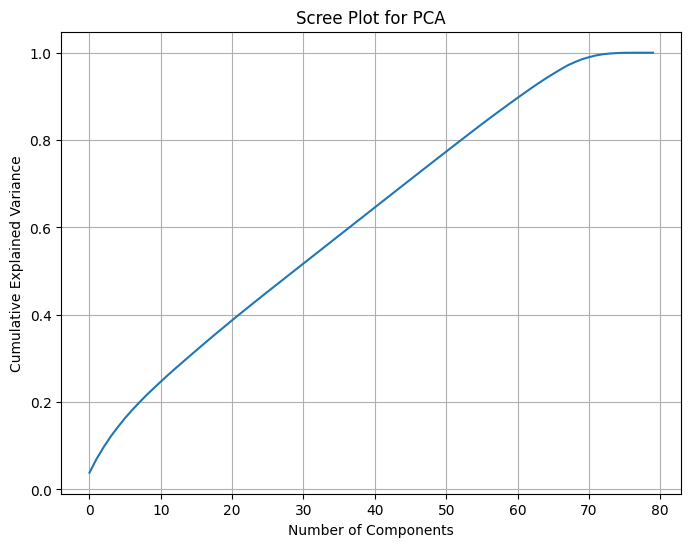

In [17]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot for PCA')
plt.grid(True)
plt.show()

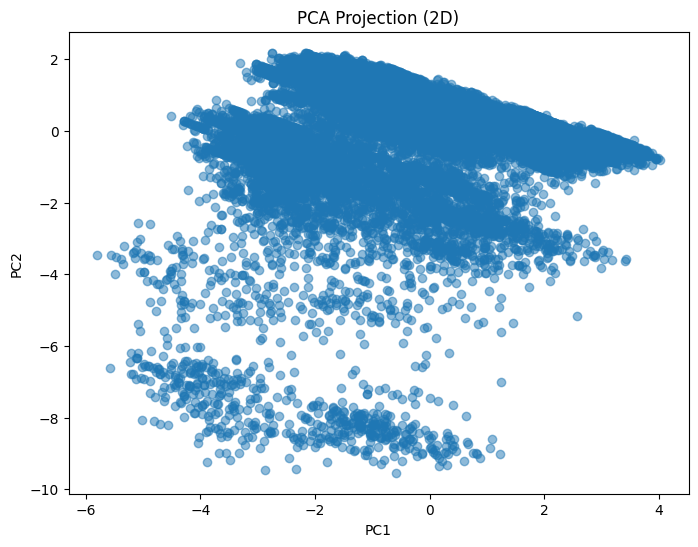

In [18]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.5)
plt.title("PCA Projection (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [19]:
pca = PCA(n_components=0.90)
data_pca = pca.fit_transform(data_scaled)

In [20]:
# Convert to DataFrame
pca_df = pd.DataFrame(
    data_pca,
    columns=[f'PC{i+1}' for i in range(data_pca.shape[1])]
)

# Print first few rows
print(pca_df.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.436917  1.156565  0.944377 -0.113347 -0.081834 -0.049713 -0.834798   
1 -0.289531 -1.096478  0.698859 -3.108169  2.368220  0.780565 -0.253453   
2 -1.098126 -4.546891 -0.274780 -0.247504 -1.529473 -0.360470  4.555975   
3  1.471143 -0.416954 -0.800534 -0.091534 -1.749318  2.227040  2.745050   
4  3.204623 -0.469830 -0.772968  0.288397  0.567389 -1.148845 -1.490269   

        PC8       PC9      PC10  ...      PC53      PC54      PC55      PC56  \
0  0.823555 -0.833129 -0.887169  ... -0.059189  1.818110  0.530273 -1.394480   
1  1.281654  0.440306 -0.498565  ...  0.080680  1.827253  0.430902 -1.473624   
2  1.223924  2.825744  0.159470  ... -2.748184 -0.805383  0.176542 -1.967094   
3 -0.919628  1.977195 -1.168396  ... -0.213925 -0.023134  0.315298  0.552268   
4 -1.307589  1.710095  0.027477  ...  0.347325  0.267542  0.181530  0.337867   

       PC57      PC58      PC59      PC60      PC61      PC62  
0 -0

#Clustering

#KMeans++

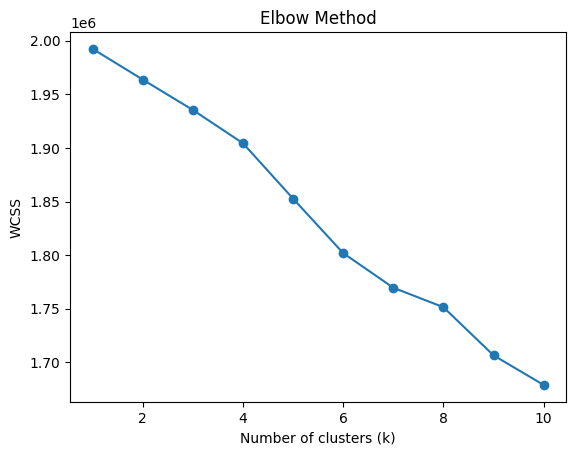

In [21]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)   # or X_scaled
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

- High Dimensionality (80+ features after encoding)
- With many features, the WCSS (inertia) curve can drop smoothly without a sharp bend.
- The “elbow” becomes less obvious because variance is spread across many dimensions.
- Option 2: Use Silhouette Score Alongside Elbow


In [22]:
scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_pca)  # or X_scaled
    score = silhouette_score(data_pca, labels)
    scores[k] = score
    print(f"k={k}, silhouette score={score:.3f}")

# Find best k
best_k = max(scores, key=scores.get)
print("Best number of clusters based on silhouette:", best_k)

k=2, silhouette score=0.594
k=3, silhouette score=0.596
k=4, silhouette score=0.591
k=5, silhouette score=0.128
k=6, silhouette score=0.115
k=7, silhouette score=0.090
k=8, silhouette score=0.119
k=9, silhouette score=0.080
k=10, silhouette score=0.081
Best number of clusters based on silhouette: 3


In [23]:
best_k = 2

kmeans = KMeans(n_clusters=best_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(data_pca)  # or X_scaled


data['cluster'] = labels

In [24]:
data['cluster']

,cluster
2,1
3,0
4,0
5,0
7,0
...,...
47522,1
47523,0
47526,1
47527,1


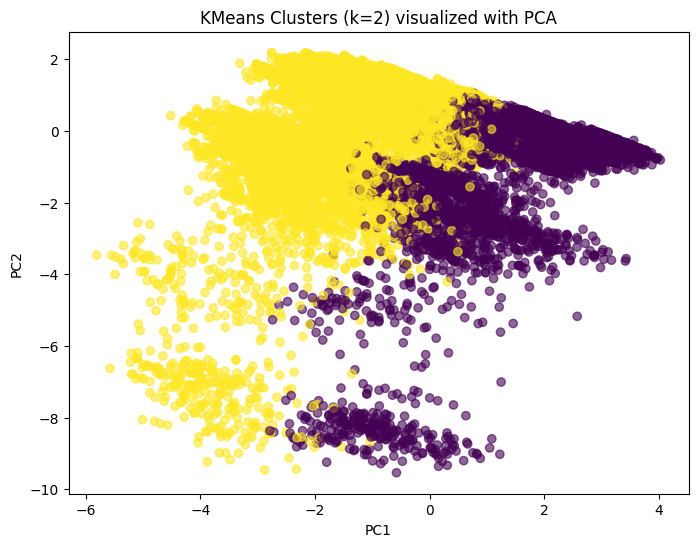

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0], data_pca[:,1], c=labels, cmap='viridis', alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"KMeans Clusters (k={best_k}) visualized with PCA")
plt.show()

In [26]:
ct = pd.crosstab(data['cluster'], y)
ct

income,<=50K,<=50K.,>50K,>50K.
cluster,,,,
0,5298,2412,3564,1634
1,9880,4630,482,223


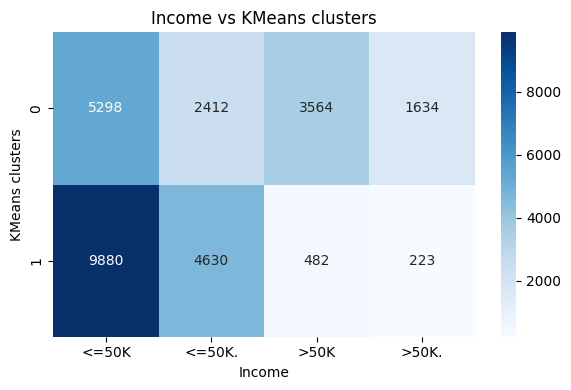

In [27]:
plt.figure(figsize=(6, 4))
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.ylabel("KMeans clusters")
plt.xlabel("Income")
plt.title("Income vs KMeans clusters")
plt.tight_layout()
plt.show()


#AgglomerativeClustering

In [28]:
X = np.array(data_scaled)

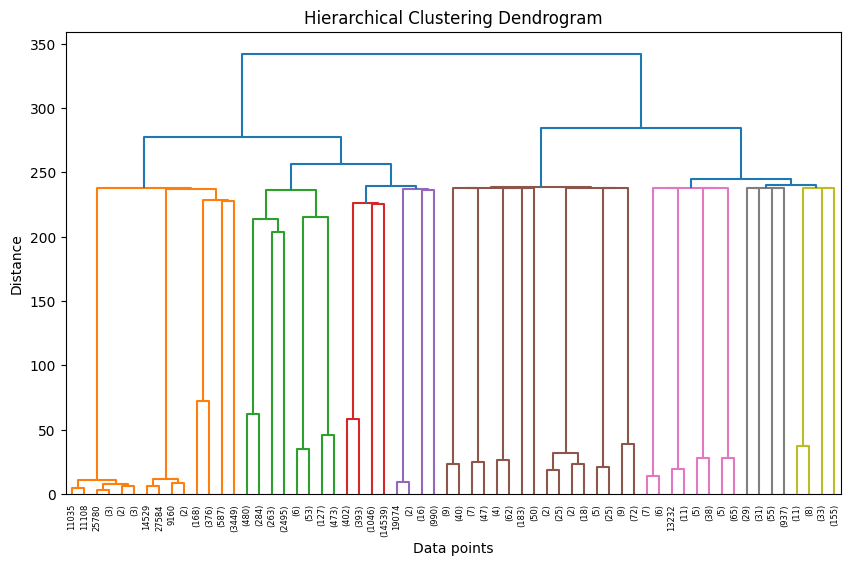

In [29]:

import matplotlib.pyplot as plt

Z = linkage(data_scaled, method='ward')
plt.figure(figsize=(10,6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

In [30]:
scores = {}
for k in range(2, 11):
    agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agg.fit_predict(data_pca)  # or X_scaled
    score = silhouette_score(data_pca, labels)
    scores[k] = score
    print(f"k={k}, silhouette score={score:.3f}")

# Best k
best_k = max(scores, key=scores.get)
print("Best number of clusters based on silhouette:", best_k)

k=2, silhouette score=0.626
k=3, silhouette score=0.627
k=4, silhouette score=0.127
k=5, silhouette score=0.115
k=6, silhouette score=0.116
k=7, silhouette score=0.118
k=8, silhouette score=0.119
k=9, silhouette score=0.122
k=10, silhouette score=0.123
Best number of clusters based on silhouette: 3


In [31]:
best_k = 3
agg = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
labels = agg.fit_predict(data_pca)



data['agg_cluster'] = labels

In [32]:
data['agg_cluster']

,agg_cluster
2,0
3,0
4,1
5,0
7,0
...,...
47522,0
47523,0
47526,0
47527,0


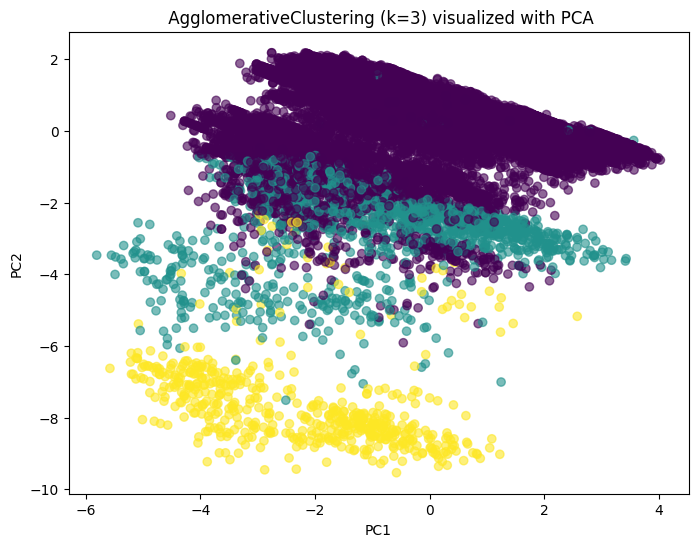

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0], data_pca[:,1], c=labels, cmap='viridis', alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f" AgglomerativeClustering (k={best_k}) visualized with PCA")
plt.show()

In [34]:
ct2 = pd.crosstab(data['agg_cluster'], y)
ct2

income,<=50K,<=50K.,>50K,>50K.
agg_cluster,,,,
0,14057,6537,3775,1749
1,833,376,173,63
2,288,129,98,45


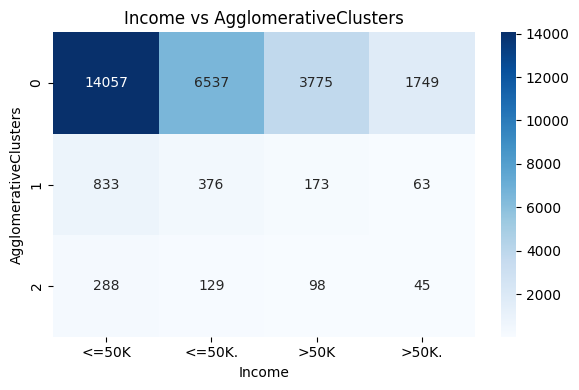

In [35]:
plt.figure(figsize=(6, 4))
sns.heatmap(ct2, annot=True, fmt="d", cmap="Blues")
plt.ylabel("AgglomerativeClusters")
plt.xlabel("Income")
plt.title("Income vs AgglomerativeClusters")
plt.tight_layout()
plt.show()


In [36]:
cluster_profile = data.groupby('agg_cluster').mean(numeric_only=True)
print(cluster_profile)

                   age  education-num  capital-gain  capital-loss  \
agg_cluster                                                         
0            37.949805      10.240332           0.0           0.0   
1            37.085813       9.802076           0.0           0.0   
2            37.450000      11.442857           0.0           0.0   

             hours-per-week   cluster  
agg_cluster                            
0                 41.350448  0.541159  
1                 40.867128  0.555709  
2                 40.810714  0.496429  


In [37]:
categorical_profile = pd.crosstab(data['agg_cluster'], y, normalize='index')
print(categorical_profile)

income          <=50K    <=50K.      >50K     >50K.
agg_cluster                                        
0            0.538211  0.250287  0.144536  0.066965
1            0.576471  0.260208  0.119723  0.043599
2            0.514286  0.230357  0.175000  0.080357
